In [98]:
import json, requests, time
from sqlalchemy import create_engine
import pandas as pd

engine = create_engine('postgresql://postgres:argmax@pg:5432/postgres')


# Data
Every time a user opens a mobile app, an auction is going on behind the scenes. The highest bidder gets to advertise his ad to the user.
## Auctions Table

In [99]:
sql_query = 'SELECT * FROM auctions;'
with engine.connect() as db_con:
    auctions_df = pd.read_sql(sql_query, con=db_con)

auctions_df.drop_duplicates(subset=auctions_df.columns[1:],inplace=True)
auctions_df

,id,eventTimestamp,unitDisplayType,brandName,bundleId,countryCode,deviceId,osAndVersion,bidFloorPrice,sentPrice
0,1,1657758857892,rewarded,Generic,com.loop.match3d,US,6a0a94554cf,Android-4.0,0.05,0.06
1,2,1657210707978,interstitial,Generic,com.loop.match3d,ZA,6a0b0e59f45,Android-4.0,0.01,0.16
2,3,1657392939412,interstitial,Motorola,com.YayySAL.DodgeAgent,BR,6a0fa820c46,Android-10.0,0.05,0.06
3,4,1657386816882,interstitial,Huawei,com.tintash.nailsalon,IQ,6a142bdbea2,Android-9.0,0.01,0.05
4,5,1657211600823,banner,Generic,com.tilegarden.match3,US,6a16943a771,Android-4.0,0.01,0.03
...,...,...,...,...,...,...,...,...,...,...
41579,41580,1657731605063,banner,Generic,com.tilegarden.match3,NZ,80edf5837e8,Android-4.0,0.01,0.02
41580,41581,1657657131101,interstitial,Apple,1436213906,VN,80ee6a5eebf,iOS-13.6,0.01,0.90
41581,41582,1657156070854,rewarded,Generic,com.loop.match3d,US,80efe531afc,Android-4.0,0.05,0.69
41582,41583,1657659603568,banner,Apple,1502447854,US,80f02dd397f,iOS-15.0,0.01,0.10


## App Vectors table
We've gathered the first few sentences from the app store description and embedded it with a [model](https://huggingface.co/mixedbread-ai/mxbai-embed-large-v1)

In [100]:
sql_query = f'''
SELECT
    *
FROM app_vectors
'''
has_embedding = False
while not has_embedding:
    with engine.connect() as db_con:
        df = pd.read_sql(sql_query, con=db_con)
    has_embedding = (~df["embedding"].isna()).all()
    if not has_embedding:
        print("Waiting for embeddings...")
        time.sleep(15)

df.drop_duplicates(subset=df.columns[1:],inplace=True)
df

,id,bundleId,content,embedding
0,1,com.loop.match3d,"Get ready for a new, challenging and original ...","[0.3168352,0.6250086,-0.12035585,0.21742323,-0..."
1,2,com.YayySAL.DodgeAgent,"Your mission, should you choose to accept it, ...","[0.5411282,0.7446755,-0.5817451,0.95967793,0.0..."
2,3,com.tintash.nailsalon,It is manicure madness over here and it�s your...,"[0.31176656,0.6059464,-1.1395648,0.07631045,-0..."
3,4,com.tilegarden.match3,\nIf you enjoy playing Match 3 tile & mahjong ...,"[0.050924458,1.0967327,-0.30831614,0.13220672,..."
4,6,com.AppIdeas.LevelUpRunner,"Are you a real hero? Are you the strongest, th...","[0.897561,0.46442518,-0.18019226,1.2617054,0.0..."
5,17,1582745578,Dominate the coal industry and become the next...,"[0.88490486,0.65851957,-0.3386694,0.18323663,0..."
6,18,1569586264,Choose the appropriate outfit to make it throu...,"[0.2000534,0.36083463,-0.13792263,0.34308642,-..."
7,5,com.kamilbilge.ropesavior3d,Become the hero we need in this tangled puzzle...,"[0.5112473,0.5128061,-0.05630451,1.2819325,0.1..."
8,7,se.ace.fishinc,Gather your riches and travel across the open ...,"[0.73094344,0.4112171,-0.6196014,0.53501374,0...."
9,8,com.volt.dresstoimpress,\nChoose the appropriate outfit to make it thr...,"[0.2000534,0.36083463,-0.13792263,0.34308642,-..."


We can use the `<=>` operator to run vector search within the database

In [101]:

vec = json.loads(df.embedding[0]) # get the first embedding
print ("Embedding size: {l}".format(l=len(vec)))

sql_query = f'''
SELECT
    "bundleId"
FROM app_vectors
ORDER BY embedding<=>'{json.dumps(vec)}'
'''
with engine.connect() as db_con:
    similar_df = pd.read_sql(sql_query, con=db_con)

similar_df.drop_duplicates()

Embedding size: 1024


,bundleId
0,com.loop.match3d
2,1502447854
4,1529614832
6,com.tilegarden.match3
8,1579489488
10,com.kamilbilge.ropesavior3d
12,1436213906
14,com.AppIdeas.LevelUpRunner
15,1586795332
18,se.ace.fishinc


# What you need to do
## The hypothesis
We assume that apps with similar desciptions, would have a similar asking price in the auctions (`sentPrice` column).

Use cosine similarity (`<=>`) on the embeddings to find similar apps, and any statistical tools you find suitable to prove or disprove this hypothesis.

## Is it consistent?
There are several other features in the auctions table (such as `CountryCode` and `OS`), 
Do your findings hold for those as well?

In [11]:
%pip install matplotlib
%pip install numpy
%pip install pycountry-convert
%pip install scipy
%pip install seaborn

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [102]:
import matplotlib.pyplot as plt
from scipy.stats import ks_2samp
import numpy as np
import seaborn as sns
import pycountry_convert as pc
import itertools

## Let us first examine the cosine similarity between our vectors.

In [103]:
sql_query = '''

SELECT distinct
    t1."bundleId" AS vector_id,
    t2."bundleId" AS closest_vector_id,
    t1."embedding" <=> t2."embedding" AS cosine_similarity
FROM app_vectors t1,app_vectors t2    
'''

with engine.connect() as db_con:
    query_df = pd.read_sql(sql_query, con=db_con)
query_df
pivot_df = query_df.pivot(index='vector_id', columns='closest_vector_id', values='cosine_similarity')
pivot_df

closest_vector_id,1436213906,1502447854,1523081624,1529614832,1542256628,1569586264,1579489488,1582745578,1586795332,com.AppIdeas.LevelUpRunner,com.YayySAL.DodgeAgent,com.kamilbilge.ropesavior3d,com.loop.match3d,com.tilegarden.match3,com.tintash.nailsalon,com.volt.dresstoimpress,dovi.coalmining.inc,se.ace.fishinc
vector_id,,,,,,,,,,,,,,,,,,
1436213906,0.000000,0.449619,0.521262,0.568431,0.489774,0.591438,0.501960,0.323117,0.521239,0.521239,0.489774,0.501960,0.469628,0.519442,0.521262,0.591438,0.323117,0.043626
1502447854,0.449619,0.000000,0.502151,0.257184,0.495702,0.467118,0.410480,0.509138,0.478689,0.478689,0.495702,0.410480,0.077363,0.338355,0.502151,0.467118,0.509138,0.480431
1523081624,0.521262,0.502151,0.000000,0.602279,0.610829,0.495526,0.602592,0.474850,0.545834,0.545834,0.610829,0.602592,0.540656,0.581153,0.000000,0.495526,0.474851,0.548918
1529614832,0.568431,0.257184,0.602279,0.000000,0.555603,0.527223,0.489265,0.591299,0.565478,0.565478,0.555603,0.489265,0.280942,0.141846,0.602279,0.527223,0.591299,0.577777
1542256628,0.489774,0.495702,0.610829,0.555603,0.000000,0.562197,0.352162,0.509314,0.410429,0.410429,0.000000,0.352162,0.519025,0.553061,0.610829,0.562197,0.509314,0.514294
1569586264,0.591438,0.467118,0.495526,0.527223,0.562197,0.000000,0.554537,0.622133,0.462763,0.462763,0.562197,0.554537,0.498199,0.537533,0.495526,0.000000,0.622133,0.596807
1579489488,0.501960,0.410480,0.602592,0.489265,0.352162,0.554537,0.000000,0.488587,0.409027,0.409027,0.352162,0.000000,0.442120,0.515130,0.602592,0.554537,0.488587,0.527230
1582745578,0.323117,0.509138,0.474850,0.591299,0.509314,0.622133,0.488587,0.000000,0.550057,0.550057,0.509314,0.488587,0.530259,0.555205,0.474850,0.622133,0.000000,0.330072
1586795332,0.521239,0.478689,0.545834,0.565478,0.410429,0.462763,0.409027,0.550057,0.000000,0.000000,0.410429,0.409027,0.490351,0.592141,0.545834,0.462763,0.550057,0.573123


### I observed zero values outside the diagonal, indicating the presence of duplicate vectors. These duplicates can be combined to extend the samples for some apps

In [104]:
zero_indices = np.where(pivot_df == 0)
non_diagonal_indices = [(i, j) for i, j in zip(*zero_indices) if i != j]
non_diagonal_indices_unique = list(set([tuple(sorted(indices)) for indices in non_diagonal_indices]))
non_diagonal_zero_bundle_apps = {pivot_df.index[i]: pivot_df.columns[j] for i, j in non_diagonal_indices_unique}
non_diagonal_zero_bundle_apps

{'1523081624': 'com.tintash.nailsalon',
 '1542256628': 'com.YayySAL.DodgeAgent',
 '1569586264': 'com.volt.dresstoimpress',
 '1579489488': 'com.kamilbilge.ropesavior3d',
 '1582745578': 'dovi.coalmining.inc',
 '1586795332': 'com.AppIdeas.LevelUpRunner'}

In [105]:
auctions_df.bundleId.unique()

array(['com.loop.match3d', 'com.YayySAL.DodgeAgent',
       'com.tintash.nailsalon', 'com.tilegarden.match3',
       'com.kamilbilge.ropesavior3d', '1529614832', '1523081624',
       '1502447854', 'com.AppIdeas.LevelUpRunner', 'se.ace.fishinc',
       '1436213906', '1542256628', 'com.volt.dresstoimpress',
       '1579489488', 'dovi.coalmining.inc', '1586795332', '1582745578',
       '1569586264'], dtype=object)

In [106]:
auctions_df.bundleId = auctions_df.bundleId.replace(non_diagonal_zero_bundle_apps)
remaining_ids = auctions_df.bundleId.unique()
pivot_df.loc[remaining_ids,remaining_ids]

closest_vector_id,com.loop.match3d,com.YayySAL.DodgeAgent,com.tintash.nailsalon,com.tilegarden.match3,com.kamilbilge.ropesavior3d,1529614832,1502447854,com.AppIdeas.LevelUpRunner,se.ace.fishinc,1436213906,com.volt.dresstoimpress,dovi.coalmining.inc
vector_id,,,,,,,,,,,,
com.loop.match3d,0.000000,0.519025,0.540656,0.341363,0.442120,0.280942,0.077363,0.490351,0.497076,0.469628,0.498199,0.530259
com.YayySAL.DodgeAgent,0.519025,0.000000,0.610829,0.553061,0.352162,0.555603,0.495702,0.410429,0.514294,0.489774,0.562197,0.509314
com.tintash.nailsalon,0.540656,0.610829,0.000000,0.581153,0.602592,0.602279,0.502151,0.545834,0.548918,0.521262,0.495526,0.474851
com.tilegarden.match3,0.341363,0.553061,0.581153,0.000000,0.515130,0.141846,0.338355,0.592141,0.521064,0.519442,0.537533,0.555205
com.kamilbilge.ropesavior3d,0.442120,0.352162,0.602592,0.515130,0.000000,0.489265,0.410480,0.409027,0.527230,0.501960,0.554537,0.488587
1529614832,0.280942,0.555603,0.602279,0.141846,0.489265,0.000000,0.257184,0.565478,0.577777,0.568431,0.527223,0.591299
1502447854,0.077363,0.495702,0.502151,0.338355,0.410480,0.257184,0.000000,0.478689,0.480431,0.449619,0.467118,0.509138
com.AppIdeas.LevelUpRunner,0.490351,0.410429,0.545834,0.592141,0.409027,0.565478,0.478689,0.000000,0.573123,0.521239,0.462763,0.550057
se.ace.fishinc,0.497076,0.514294,0.548918,0.521064,0.527230,0.577777,0.480431,0.573123,0.000000,0.043626,0.596807,0.330072


### The numerical IDs and the low similarity values have caught my attention. Therefore, let's examine their context to gain a better understanding

In [9]:
df.loc[df.bundleId.isin(['1436213906'	,'se.ace.fishinc'])].iloc[0,2]

'Gather your riches and travel across the open seas in this addictive idle clicker game. Swipe away to catch fish and gain money. Hire crew members to help expand your empire! Buy legendary items to ease your fishing quest. '

In [10]:
df.loc[df.bundleId.isin(['1436213906'	,'se.ace.fishinc'])].iloc[1,2]

'Gather your riches and travel across the open seas in this addictive idle clicker game. Swipe away to catch fish and gain money. Hire crew members to help expand your empire! Buy legendary items to ease your fishing quest. Use your new found wealth to unlock new regions to explore and upgrade your boat! Start your adventure now! The one thing you have to ask yourself is: can you catch the Big One?'

In [11]:
df.loc[df.bundleId.isin(['1502447854',	'com.loop.match3d'])].iloc[0,2]

'Get ready for a new, challenging and original matching pairs brain game.\nYou need to match 3D objects on the ground and pop them all! When you clear a level, you will find new objects to pair. Sort and find all pairs, clear the board and win!'

In [12]:
df.loc[df.bundleId.isin(['1502447854',	'com.loop.match3d'])	].iloc[1,2]

'Get ready for a new, challenging and original matching pairs game.\n\nYou need to match 3D objects on the ground and pop them all! When you clear a level, you will find new objects to pair.'

In [13]:
df.loc[df.bundleId.isin(['1529614832',	'com.tilegarden.match3'])].iloc[0,2]

'\nIf you enjoy playing Match 3 tile & mahjong games, you�ll fall in love with Tile Garden Match 3 Puzzle Casual Game! No timer, no pressure, just a fun mix of relaxing sceneries &amp unlimited match 3 mahjong puzzles paired with ASMR sounds and fun tile designs.'

In [14]:
df.loc[df.bundleId.isin(['1529614832',	'com.tilegarden.match3'])].iloc[1,2]

'Are you a fan of match-three & matching games? Tile Garden: Match 3 Puzzle will fulfil your need for matching fun with new puzzle challenges every day! Simply match three tiles to reveal more tiles underneath and continue matching until you clear everything, but beware, If you select too many tiles without at least matching three you will have to begin your journey over again.'

### It appears that these are the same apps. Let's examine some features in the auction DataFrame to see if they can help us make this conclusion more robust.

In [108]:
auctions_df['groupedOsAndVersion'] = auctions_df.osAndVersion.str.split('-').str[0]

In [109]:
bundelids_to_check = ['1436213906'	,'se.ace.fishinc','1502447854',	
                      'com.loop.match3d','1529614832','com.tilegarden.match3']
auctions_df.loc[auctions_df.bundleId.isin(bundelids_to_check)].groupby(by=['bundleId','groupedOsAndVersion']).agg('count')

,,id,eventTimestamp,unitDisplayType,brandName,countryCode,deviceId,osAndVersion,bidFloorPrice,sentPrice
bundleId,groupedOsAndVersion,,,,,,,,,
1436213906,iOS,1266,1266,1266,1266,1266,1266,1266,1266,1266
1502447854,iOS,3185,3185,3185,3185,3185,3185,3185,3185,3185
1529614832,iOS,424,424,424,424,424,424,424,424,424
com.loop.match3d,Android,10561,10561,10561,10561,10561,10561,10561,10561,10561
com.tilegarden.match3,Android,2559,2559,2559,2559,2559,2559,2559,2559,2559
se.ace.fishinc,Android,4994,4994,4994,4994,4994,4994,4994,4994,4994


### It appears that there is perfect separation, and the difference in context is likely due to the different operating systems. In order to have more data for each bundle, let's combine them as well. However, since it's not certain from the text alone that '1529614832' is a duplicate app, I will not combine it.

In [110]:
seconde_map = {'1436213906': 'se.ace.fishinc',
               '1502447854': 'com.loop.match3d'}
auctions_df['bundleId'] = auctions_df.bundleId.replace(seconde_map)

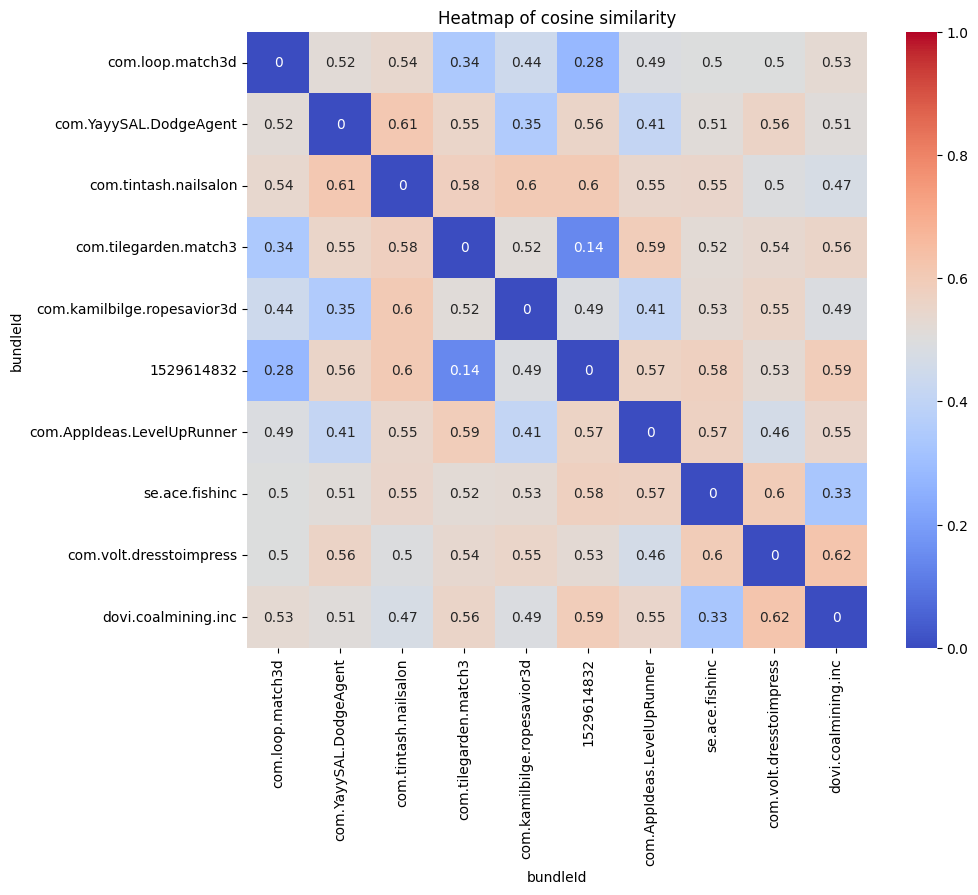

In [111]:
remaining_categories = auctions_df.bundleId.unique()
filtered_pivot_table = pivot_df.loc[remaining_categories, remaining_categories]
plt.figure(figsize=(10, 8)) 
sns.heatmap(filtered_pivot_table, annot=True, cmap='coolwarm', vmin=0, vmax=1)

plt.title('Heatmap of cosine similarity')
plt.xlabel('bundleId') 
plt.ylabel('bundleId')


plt.show()

### Now, let's examine our 'sent price' data to better understand its distribution. This will help us choose the most appropriate method for assessing similarity in the 'sent price' behavior.

In [19]:
auctions_df.sentPrice.describe(np.arange(0,1.1,0.1))

count    41584.000000
mean         1.329646
std          7.118817
min          0.010000
0%           0.010000
10%          0.020000
20%          0.020000
30%          0.040000
40%          0.060000
50%          0.070000
60%          0.120000
70%          0.280000
80%          0.690000
90%          2.660000
100%       441.020000
max        441.020000
Name: sentPrice, dtype: float64

### The distribution appears to be continuous with tails. To examine the similarity in the 'sent price', I will use the Kolmogorov-Smirnov test.

In [112]:
pairs = itertools.combinations(remaining_categories, 2)
results = []
for ids_1, ids_2 in pairs:
    # Extract the relevant rows for each element of the pair
    data1 = auctions_df[auctions_df.bundleId == ids_1].sentPrice
    data2 = auctions_df[auctions_df.bundleId == ids_2].sentPrice

    _, p_value = ks_2samp(data1, data2)
    results.append({'ids_1': ids_1,'ids_2':ids_2 ,'p_value': p_value})
    results.append({'ids_1': ids_2,'ids_2':ids_1 ,'p_value': p_value})
results_df = pd.DataFrame(results)

In [113]:
p_pivot_df = results_df.pivot(index='ids_1', columns='ids_2', values='p_value')
p_pivot_df = p_pivot_df.loc[remaining_categories,remaining_categories]

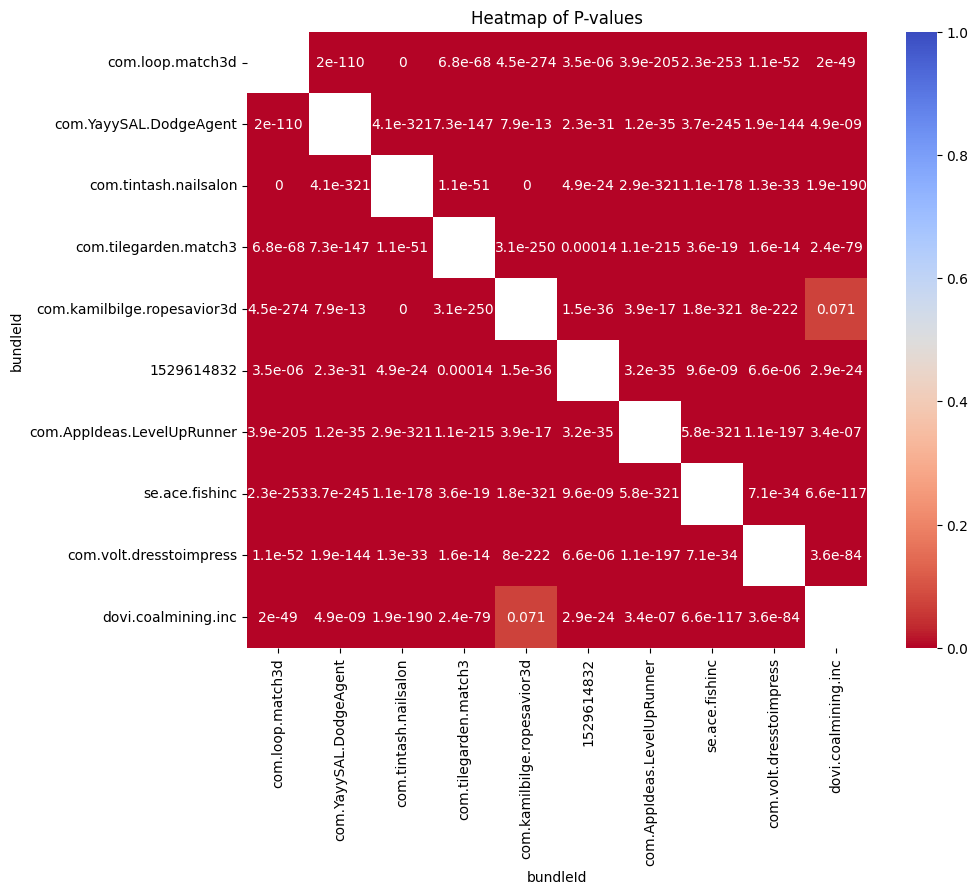

In [114]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8)) 
sns.heatmap(p_pivot_df, annot=True, cmap='coolwarm_r', vmin=0, vmax=1)

# Customizations
plt.title('Heatmap of P-values')
plt.xlabel('bundleId')  
plt.ylabel('bundleId')    

# Show the plot
plt.show()

### Due to the very small p-values, we can reject the null hypothesis of the test, which suggests that the samples are not from the same distribution. Therefore, we cannot conclude that they are similar, regardless of their cosine similarity



#### Note: "As I understand it, in the second part, we are still testing the same assumption but can utilize additional features from the auction table."

### Now, let's use the features we have to better intersect our data and hope for improved results. First, let's examine the country code (note: I have already done this for the operating system and have engineered the feature accordingly).

In [23]:
auctions_df.countryCode.value_counts().describe(np.arange(0,1.1,0.1))

count      171.000000
mean       243.181287
std        880.265727
min          1.000000
0%           1.000000
10%          1.000000
20%          3.000000
30%          6.000000
40%         15.000000
50%         31.000000
60%         57.000000
70%        106.000000
80%        211.000000
90%        503.000000
100%     10410.000000
max      10410.000000
Name: count, dtype: float64

### This distribution is too sparse, and if we intersect with that data, we will have many small samples. Therefore, I will engineer that feature to continents rather then countries.

In [24]:

def get_continent(country_code):
    try:
        continent_code = pc.country_alpha2_to_continent_code(country_code)
        continent_name = pc.convert_continent_code_to_continent_name(continent_code)
        return continent_name
    except KeyError:
        return 'REST'

In [25]:
auctions_df['continent'] = auctions_df.countryCode.apply(get_continent)

In [26]:
auctions_df['continent'].value_counts()

continent
North America    13299
Asia             11788
Europe           10272
South America     3735
Africa            1555
Oceania            935
Name: count, dtype: int64

### In order to ensure that each continent has a sufficient number of apps, I will merge the last three continents into a single category called 'Rest of the World'

In [115]:
def modified_get_continent(country_code):
    try:
        continent_code = pc.country_alpha2_to_continent_code(country_code)
        continent_name = pc.convert_continent_code_to_continent_name(continent_code)
        if continent_name in ['North America', 'Asia', 'Europe']:
            return continent_name
        else:
            return 'Rest of the World'
    except KeyError:
        return 'Rest of the World'

In [116]:
auctions_df['continent'] = auctions_df.countryCode.apply(modified_get_continent)
auctions_df['continent'].value_counts()

continent
North America        13299
Asia                 11788
Europe               10272
Rest of the World     6225
Name: count, dtype: int64

## Now, let's intersect the data into smaller groups with shared attributes in order to enhance the similarity

In [118]:
results_3 = []
for os_continent in auctions_df.continent.unique():
    for os_system in auctions_df.groupedOsAndVersion.unique():
        for ids_1, ids_2 in itertools.combinations(remaining_categories, 2):
            data1 = auctions_df[(auctions_df.bundleId == ids_1) & 
                                (auctions_df.continent == os_continent) &
                                (auctions_df.groupedOsAndVersion == os_system)].sentPrice
            data2 = auctions_df[(auctions_df.bundleId == ids_2) &
                                (auctions_df.continent == os_continent) &
                                (auctions_df.groupedOsAndVersion == os_system)].sentPrice
            if data1.empty or data2.empty:
                p_value = np.nan
            else:
                _, p_value = ks_2samp(data1, data2)
            results_3.append({'ids_1': ids_1, 'ids_2': ids_2, 'continent': os_continent, 'operating_system': os_system, 'p_value': p_value, 'test_size':(data1.size,data2.size)})

results_df_3 = pd.DataFrame(results_3)

,ids_1,ids_2,continent,operating_system,p_value,test_size
11,com.YayySAL.DodgeAgent,com.kamilbilge.ropesavior3d,North America,Android,0.964752,"(194, 512)"
7,com.loop.match3d,com.volt.dresstoimpress,North America,Android,0.944841,"(4371, 7)"
346,com.kamilbilge.ropesavior3d,com.AppIdeas.LevelUpRunner,Europe,iOS,0.908056,"(59, 76)"
259,com.kamilbilge.ropesavior3d,dovi.coalmining.inc,Asia,iOS,0.755996,"(76, 14)"
256,com.kamilbilge.ropesavior3d,com.AppIdeas.LevelUpRunner,Asia,iOS,0.711481,"(76, 107)"
...,...,...,...,...,...,...
348,com.kamilbilge.ropesavior3d,com.volt.dresstoimpress,Europe,iOS,NaN,"(59, 0)"
352,1529614832,com.volt.dresstoimpress,Europe,iOS,NaN,"(112, 0)"
355,com.AppIdeas.LevelUpRunner,com.volt.dresstoimpress,Europe,iOS,NaN,"(76, 0)"
357,se.ace.fishinc,com.volt.dresstoimpress,Europe,iOS,NaN,"(330, 0)"


In [122]:
results_df_3.dropna().sort_values(by='p_value',ascending=False).iloc[:20]

,ids_1,ids_2,continent,operating_system,p_value,test_size
11,com.YayySAL.DodgeAgent,com.kamilbilge.ropesavior3d,North America,Android,0.964752,"(194, 512)"
7,com.loop.match3d,com.volt.dresstoimpress,North America,Android,0.944841,"(4371, 7)"
346,com.kamilbilge.ropesavior3d,com.AppIdeas.LevelUpRunner,Europe,iOS,0.908056,"(59, 76)"
259,com.kamilbilge.ropesavior3d,dovi.coalmining.inc,Asia,iOS,0.755996,"(76, 14)"
256,com.kamilbilge.ropesavior3d,com.AppIdeas.LevelUpRunner,Asia,iOS,0.711481,"(76, 107)"
79,com.kamilbilge.ropesavior3d,dovi.coalmining.inc,North America,iOS,0.709258,"(85, 16)"
148,com.YayySAL.DodgeAgent,com.AppIdeas.LevelUpRunner,Rest of the World,iOS,0.703238,"(22, 30)"
171,1529614832,se.ace.fishinc,Rest of the World,iOS,0.697512,"(22, 121)"
266,com.AppIdeas.LevelUpRunner,dovi.coalmining.inc,Asia,iOS,0.607853,"(107, 14)"
166,com.kamilbilge.ropesavior3d,com.AppIdeas.LevelUpRunner,Rest of the World,iOS,0.578868,"(20, 30)"


### Firstly, segmenting the data into smaller groups has improved the range of the test p-values compared to the p-values we observed when comparing each app without considering other features. However, the issue is that a small sample size weakens the statistical power of the conclusion.

In [79]:
stacked_similarity_table = filtered_pivot_table.stack().reset_index()
stacked_similarity_table.columns = ['ids_1','ids_2','cosine_score']
stacked_similarity_table = stacked_similarity_table[stacked_similarity_table.ids_1 != stacked_similarity_table.ids_2]
stacked_similarity_table[['ids_1', 'ids_2']] = np.sort(stacked_similarity_table[['ids_1', 'ids_2']], axis=1)
stacked_similarity_table.drop_duplicates(subset=['ids_1', 'ids_2'])
threshold = stacked_similarity_table.cosine_score.quantile(0.25)
top_25_percent = stacked_similarity_table[stacked_similarity_table.cosine_score < threshold]
top_25_percent

,ids_1,ids_2,cosine_score
1,com.YayySAL.DodgeAgent,com.loop.match3d,0.519025
2,com.loop.match3d,com.tintash.nailsalon,0.540656
3,com.loop.match3d,com.tilegarden.match3,0.341363
4,com.kamilbilge.ropesavior3d,com.loop.match3d,0.442120
5,1529614832,com.loop.match3d,0.280942
...,...,...,...
94,com.kamilbilge.ropesavior3d,dovi.coalmining.inc,0.488587
95,1529614832,dovi.coalmining.inc,0.591299
96,com.AppIdeas.LevelUpRunner,dovi.coalmining.inc,0.550057
97,dovi.coalmining.inc,se.ace.fishinc,0.330072


### Now, let's combine our test results and our cosine similarity scores to determine if our assumption has changed. In order to do that, I'll merge the top 25 percent with the lowest cosine scores (highest similarity) with the tests that have a p-value above 0.6.

In [124]:
similar_prices = results_df_3.loc[(results_df_3.p_value > 0.6)]
merged_df = pd.merge(similar_prices, top_25_percent, on=['ids_1', 'ids_2'], how='inner').sort_values(by='cosine_score')
merged_df

,ids_1,ids_2,continent,operating_system,p_value,test_size,cosine_score
0,com.YayySAL.DodgeAgent,com.kamilbilge.ropesavior3d,North America,Android,0.964752,"(194, 512)",0.352162
1,com.YayySAL.DodgeAgent,com.kamilbilge.ropesavior3d,North America,Android,0.964752,"(194, 512)",0.352162
2,com.kamilbilge.ropesavior3d,dovi.coalmining.inc,North America,iOS,0.709258,"(85, 16)",0.488587
3,com.kamilbilge.ropesavior3d,dovi.coalmining.inc,North America,iOS,0.709258,"(85, 16)",0.488587
4,com.kamilbilge.ropesavior3d,dovi.coalmining.inc,Asia,iOS,0.755996,"(76, 14)",0.488587
5,com.kamilbilge.ropesavior3d,dovi.coalmining.inc,Asia,iOS,0.755996,"(76, 14)",0.488587


### In conclusion, segmenting the data significantly improves the relationship between the context (cosine similarity of the embedded text) and the price distribution. However, claiming that similar contexts lead to similar bidding behavior is not sufficiently accurate.

# What Could Be Done Better?
### Alternative Statistical Test: Perhaps trying the Chi-square test instead of the Kolmogorov-Smirnov test could better capture the behavior of the sent price by binning the values and transforming it into a discrete category problem.
### Feature Engineering: My feature engineering might have been too robust, causing a loss of data. Using the provided features and considering intersections with a high sample volume might be more effective.
### Conclusion Method: Maybe checking if a smaller cosine score (similar context) is indeed leading to higher p-values (monotonic relation checked via Spearman correlation) would provide more insight